In [350]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df= pd.read_csv("/Users/ramneetkaur/Downloads/Netflix Userbase (1).csv")  #importing dataset 

In [7]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [10]:
df.shape

(2500, 10)

In [16]:
df.columns


Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [20]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


In [22]:
df.isnull().sum() #checking nul values 

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [24]:
df.duplicated().sum() #checking duplicates

0

# Exploratory Data Analysis 


In [37]:
df['Country'].value_counts()

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [354]:
column_title={"Country": "Country counts","Gender":"Gender count","Device": "Device count","Subscription Type":"Subscription Type count" } 

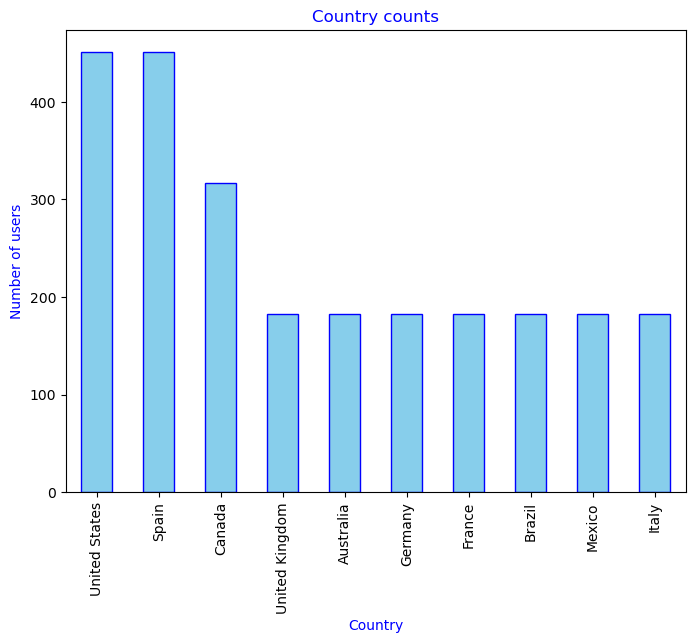

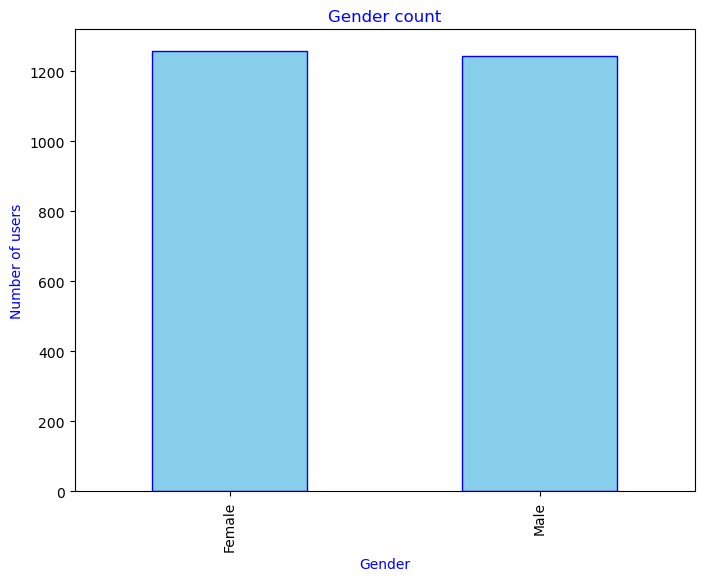

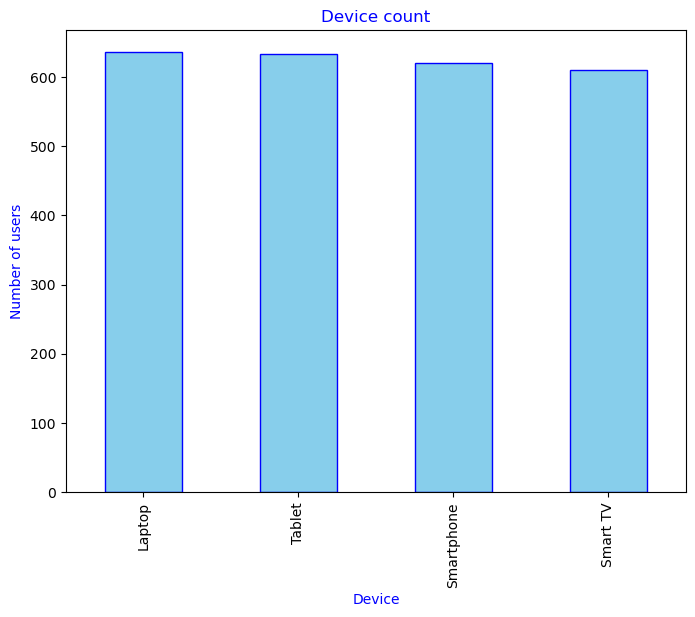

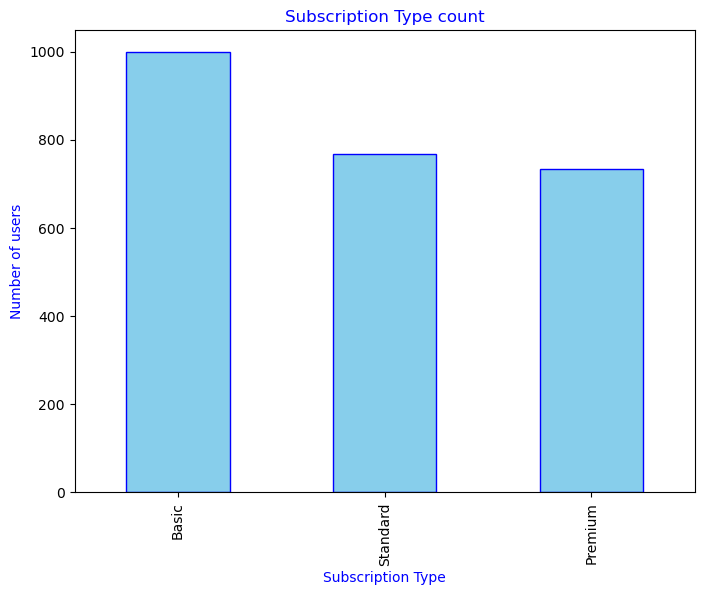

In [356]:
for column, title in column_title.items():      #Used for loops for creating multiple graphs in one go
    plt.style.use("fast")
    plt.figure(figsize=(8,6))
    df[column].value_counts().plot.bar(color= "skyblue", edgecolor="blue")
    plt.title(title, color= "blue")
    plt.xlabel(column,color= "blue")
    plt.ylabel("Number of users",color= "blue")
    plt.show()
    

In [87]:
plt.style.available #style available 

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

***The majority of users are primarily from the US and Spain, on the basic subscription plan, with a higher proportion of female users and more access via laptops and tablets.***

In [17]:
subs_by_country= df.pivot_table(columns='Subscription Type' , values='User ID', index='Country' , aggfunc='count', fill_value= 0)

In [19]:
subs_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


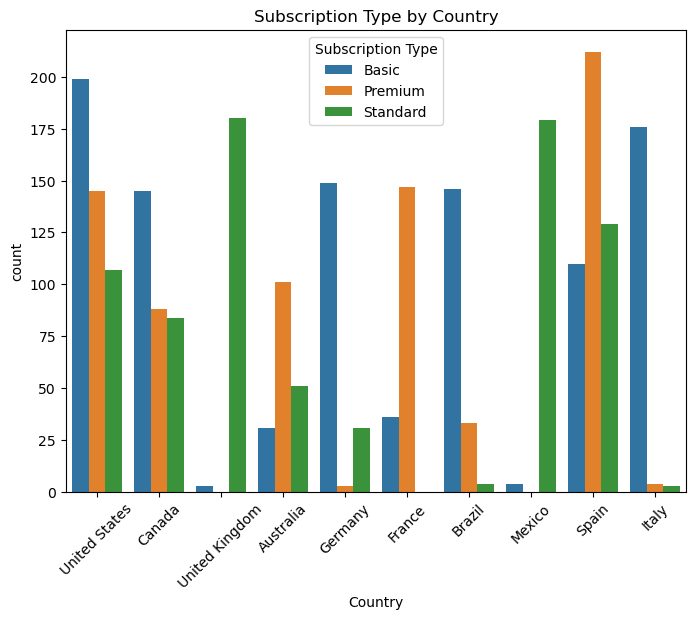

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(data= df, x= 'Country', hue= 'Subscription Type')
plt.title('Subscription Type by Country')
plt.xticks(rotation=45)
plt.show()

***The above graph shows the distribution of subscription types across countries***

In [69]:
age_df= df['Age'].value_counts().sort_index()
age_df

Age
26      1
27     87
28    115
29    104
30    116
31    115
32     92
33     93
34     88
35    105
36     99
37    107
38     89
39    116
40    103
41    114
42    102
43     94
44     86
45     89
46     99
47    111
48    101
49     97
50     84
51     93
Name: count, dtype: int64

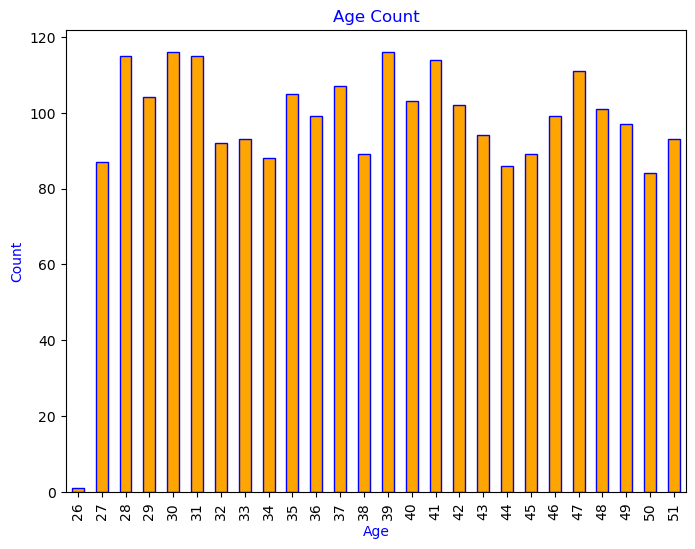

In [87]:
plt.figure(figsize=(8,6))
age_df.plot.bar(x= 'Age', y='count', color= 'orange',edgecolor= 'blue')
plt.title('Age Count', color= 'blue')
plt.xlabel('Age',color= 'blue')
plt.ylabel('Count',color='blue' )
plt.show()

***Most Netflix users fall within the age group above 26 years***

In [245]:
df['Join Date']= pd.to_datetime(df['Join Date'])          #converted to date type
df['Last Payment Date']= pd.to_datetime(df['Last Payment Date'])

In [267]:
df['Duration']= (df['Last Payment Date']- df['Join Date']).dt.days            #calculated days and months 
df['Duration_months']= (df['Last Payment Date'].dt.year- df['Join Date'].dt.year )*12 + (df['Last Payment Date'].dt.month- df['Join Date'].dt.month)

In [269]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration_months
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,25
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,8
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,5


In [271]:
df['LTV']= df['Monthly Revenue'] * df['Duration_months']       #Lifetime value(LTV)

In [273]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration_months,LTV
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21,210
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,25,375
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,8,96
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,5,50


In [279]:
LTV_per_country_sum= df.groupby('Country')['LTV'].sum().sort_values()

In [281]:
LTV_per_country_sum

Country
Italy             24121
Mexico            24217
Germany           24234
Brazil            24780
Australia         25205
France            25443
United Kingdom    25623
Canada            42213
Spain             60319
United States     61355
Name: LTV, dtype: int64

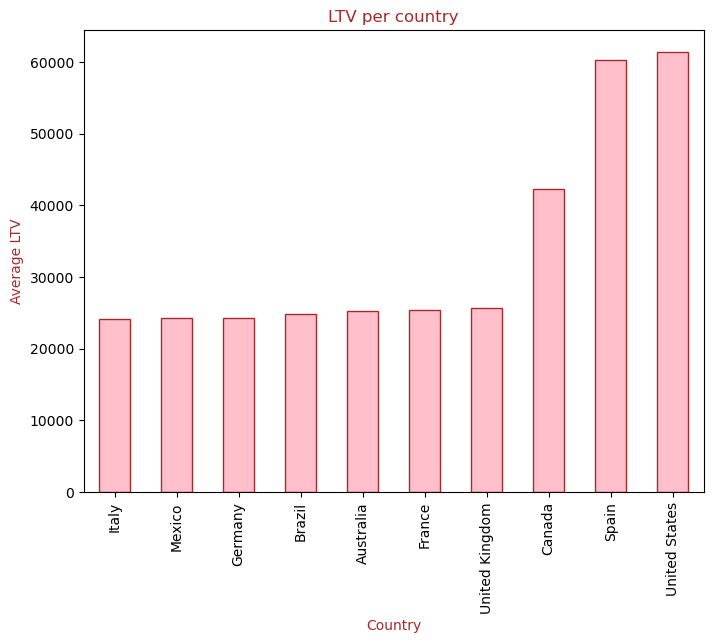

In [299]:
plt.figure(figsize=(8,6))
LTV_per_country_sum.plot.bar(color= 'pink', edgecolor="brown")
plt.title('LTV per country', color= "brown")
plt.xlabel('Country',color= "brown")
plt.ylabel('Average LTV',color= "brown")
plt.show()

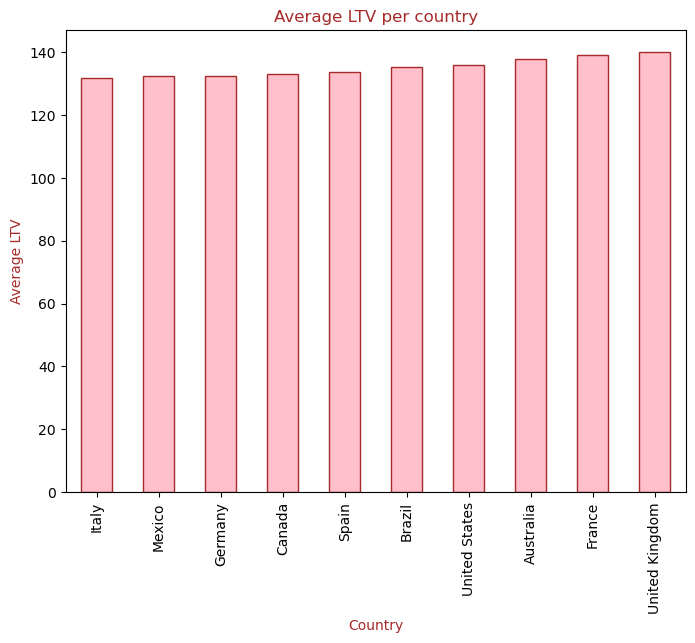

In [301]:
LTV_per_country_mean= df.groupby('Country')['LTV'].mean().sort_values()

plt.figure(figsize=(8,6))
LTV_per_country_mean.plot.bar(color= 'pink', edgecolor="brown")
plt.title('Average LTV per country', color= "brown")
plt.xlabel('Country',color= "brown")
plt.ylabel('Average LTV',color= "brown")
plt.show()

***The highest average Lifetime Value (LTV) per user is observed in the United Kingdom and France. However, the highest total LTV (i.e., the sum of LTV across all users) comes from the United States and Spain .***

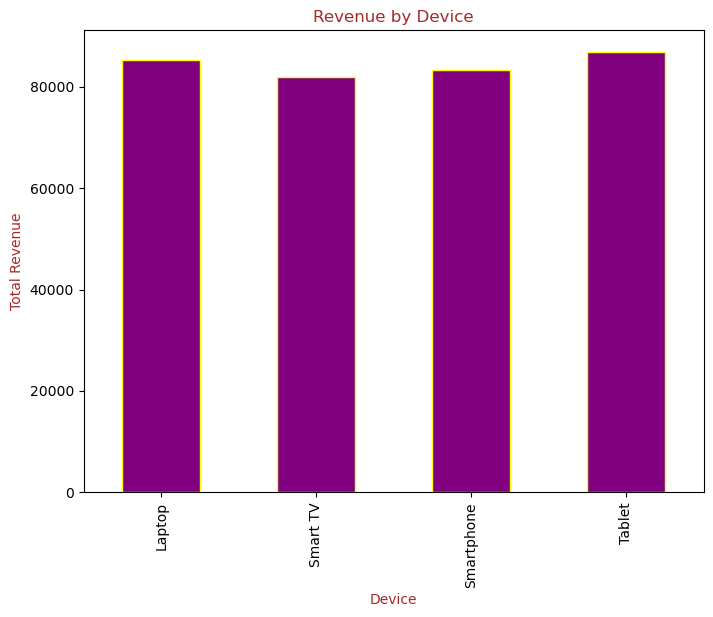

In [303]:
revenue_by_device= df.groupby('Device')['LTV'].sum()

plt.figure(figsize=(8,6))
revenue_by_device.plot.bar(color= 'purple', edgecolor="yellow")
plt.title('Revenue by Device', color= "brown")
plt.xlabel('Device',color= "brown")
plt.ylabel('Total Revenue',color= "brown")
plt.show()

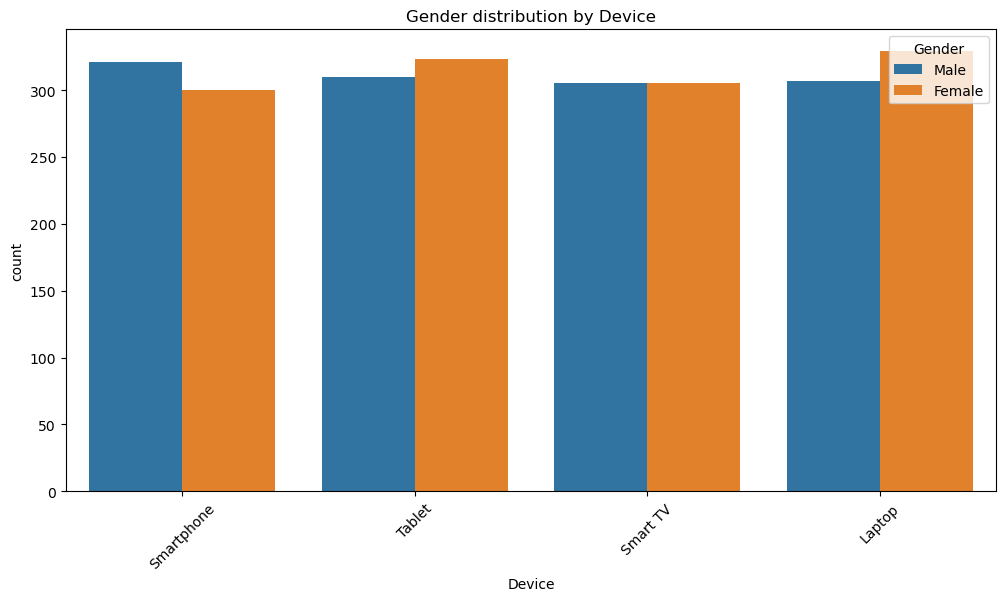

In [307]:
plt.figure(figsize=(12,6))
sns.countplot(data= df, x= 'Device', hue= 'Gender')
plt.title('Gender distribution by Device')
plt.xticks(rotation=45)
plt.show()

***The above two graph above illustrates that the highest revenue is generated from tablet, laptop users and shows device preferences by gender.***
